# Проект Принятие решений в бизнесе

Как аналитикам крупного интернет-магазина нам была поставлена задача приоритизировать гипотезы, провести А/В тестирование и проанализировать полученные результаты.

-----------
**Цель исследования**

Необходимо попределить наиболее перспективные гипотезы для улучшения показателей интернет-магазина, провести А/В тестирование и проанализировать полученные результаты.

-------------
**Исходные данные**  

Данные представлены в 3х датафреймах (hypothesis, orders, visitors) за период с 1 вгуста 2019 года по 31 августа 2019 года. 

-----
**Задачи исследования** 

Задание состоит из 2х чавстей: в первой части необходимо провести приоритизацию гипотез с иссчледованием метод к ICE и RICE, чтобы определить те гипотезы котрые имеют наибольший потенциал для магазина.  

Во второй части необходимо провести А/В тест для проверки гипотез и проанализировать полученные результаты.  


**Часть 1. Приоритизация гипотез**

* [1. Анализ датафрейма, изучение предоставленых данных и поиск в них проблемных мест](#Загрузка-данных-и-подготовка-их-к-анализу) 
* [2. Приоритизация гипотез с помощью параметров ICE](#Приоритизация-гипотез-с-помощью-параметров-ICE)
* [3. Приоритизация гипотез с помощью параметров RICE](#Приоритизация-гипотез-с-помощью-параметров-RICE)


**Часть 2. Анализ А/В - теста**

* [1. Анализ датафрейма, изучение предоставленых данных и поиск в них проблемных мест](#Загрузка-данных-для-теста-и-подготовка-их-к-анализу) 
* [2. Загрузка данных датафрейма orders](#Загрузка-данных-датафрейма-orders)
* [3. Загрузка данных датафрейма visitors](#Загрузка-данных-датафрейма-visitors)
* [4. Проверка корректности распределения посетителей на группы А и В](#Проверка-корректности-распределения-посетителей-на-группы-А-и-В)
* [5. График кумулятивной выручки по группам](#График-кумулятивной-выручки-по-группам)
* [6. График кумулятивного среднего чека по группам](#График-кумулятивного-среднего-чека-по-группам)
* [7. График относительного изменения кумулятивного среднего чека группы В к группе А](#График-относительного-изменения-кумулятивного-среднего-чека-группы-В-к-группе-А)
* [8. График кумулятивного среднего количества заказов на посетителя по группам](#График-кумулятивного-среднего-количества-заказов-на-посетителя-по-группам)
* [9. График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А ](#График-относительного-изменения-кумулятивного-среднего-количества-заказов-на-посетителя-группы-В-к-группе-А)
* [10. Точечный график количества заказов по пользователям](#Точечный-график-количества-заказов-по-пользователям)
* [11.95 и 99 перцентили количества заказов на пользователя](#95-и-99-перцентили-количества-заказов-на-пользователя)
* [12. Точечный график стоимости заказа](#Точечный-график-стоимости-заказа)
* [13. 95 и 99 перцентили стоимости заказов](#95-и-99-перцентили-стоимости-заказов)
* [14. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по сырым данным](#Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-сырым-данным)
* [15. Статистическая значимость различий в среднем чеке заказа между группами по сырым данным](#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-сырым-данным)
* [16. Статистическая значимость различий в среднем количестве заказов на посетителя между группами по очищенным данным](#Статистическая-значимость-различий-в-среднем-количестве-заказов-на-посетителя-между-группами-по-очищенным-данным)
* [17.Статистическая значимость различий в среднем чеке заказа между группами по очищенным данным](#Статистическая-значимость-различий-в-среднем-чеке-заказа-между-группами-по-очищенным-данным)
* [Вывод](#Вывод)

# Часть 1 Приоритизация гипотез

### Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import datetime as dt
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

#### Загрузка данных

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.duplicated().sum()

0

Пропусков в датафрейме нет. Данные в столбцах правильного типа, названия столбцов соответствуют змеиному регистру. Явных дубликатов нет.

### Приоритизация гипотез

#### Приоритизация гипотез с помощью параметров ICE

In [5]:
pd.options.display.max_colwidth = 400

In [6]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis.sort_values(by='ICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


#### Приоритизация гипотез с помощью параметров RICE

In [7]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] *hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Практически все гипотезы поменялись местами, и только 4 гипотеза при использовании обоих методов осталась на последнем месте. Изменения произошли из-за добавления дополнительного параметра Reach. Гипотезы с большим охватом подгимаются выше в списке, так как их реализация может принести более существенные изменения. При использовании метода RICE на первом месте оказалась гипотеза под номером 7 - у неё параметр Reach равен 10, и это самое большое значение из представленных.

Параметр Reach важен при приоритизации гипотез, так как важно понимать, какое количество пользователей затронут изменения. Поэтому оценку лучше проводить именно методом RICE.

# ***Вывод:***

Так как параметр Reach важен при приоритизации гипотез, оценку лучше проводить именно методом RICE. Исходя из этого, можно сказать, что самрй приоритетной будет гипотеза номер 7. Далее следуют гипотезы номер 2 и 0. А менее всего приоритетна гипотеза под номером 4 (это результат был получен при исследовании гипотез двумя методами).

# Часть 2 Анализ А/В - теста

### Загрузка данных для теста и подготовка их к анализу

#### Загрузка данных датафрейма orders

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
display(orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Пропусков в датафрейме нет, но столбец 'date' с неправильным типом данных.

In [10]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [12]:
orders.duplicated().sum()

0

In [13]:
min_date = orders['date'].min()
max_date = orders['date'].max()
print('Диапазон дат с {} по {}'.format(min_date, max_date))

Диапазон дат с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Пропусков в датафрейме нет. Данные в столбцах приведены к правильному типу, названия столбцов соответствуют змеиному регистру. Явных дубликатов нет. Данные представлены с 1 августа 2019 года по 31 августа 2019 года.

#### Загрузка данных датафрейма visitors

In [14]:
visitors = pd.read_csv('/datasets/visitors.csv')
display(visitors.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков в датафрейме нет, но столбец date с неправильным типом данных.

In [16]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [18]:
visitors.duplicated().sum()

0

In [19]:
min_date = visitors['date'].min()
max_date = visitors['date'].max()
print('Диапазон дат с {} по {}'.format(min_date, max_date))

Диапазон дат с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Пропусков в датафрейме нет. Данные в столбцах правильного типа, названия столбцов соответствуют змеиному регистру. Явных дубликатов нет. Данные представлены с 1 августа 2019 по 31 августа 2019 года.

 #### Проверка корректности распределения посетителей на группы А и В

Можно проверить равномерность распределения пользователей, чтобы убедиться, что группы имеют похожие размеры. 

In [20]:
# Количество посетителей в группах А и В
visitors_per_group = visitors.groupby('group')['visitors'].sum()
display(visitors_per_group)

group
A    18736
B    18916
Name: visitors, dtype: int64

Можно видеть, что в группах А и В примерно одинаковое количество посетителей, группы распределены равномерно

In [21]:
#Конверсия в группах А и В. Если группы распределы равномерно, конверсии должны быть близки по значению. 
conversion = orders.groupby('group').agg({'transactionId': 'count', 'visitorId': 'nunique'})
conversion['conversion'] = conversion['transactionId'] / conversion['visitorId']
display(conversion)

,transactionId,visitorId,conversion
group,,,
A,557,503,1.107356
B,640,586,1.092150


Конверсия для обеих групп имеет близкие по величине значения. Можно считать, что группы А и В распределены равномерно.

In [22]:
#Если значение p-value будет больше заданного уровня значимости (5%), можно говорить о равномерном распределении групп.
groupA = orders[orders['group']=='A']['revenue']
groupB = orders[orders['group'] == 'B']['revenue']
print("p-value = {0:.3f}".format(stats.mannwhitneyu(groupA, groupB)[1]))

p-value = 0.729


Зачение p-value выше уровня значимоста в 5%, что говорит об отсутствии статистически важных различий.

На основании проведенной проверки можно сказать, что выборка корректно распределена на группы А и В.

Проверим необходимый размер выборки. Для этого воспользуемся специальным калькулятором.
Для расчёта необходимо вычислить текущую конверсию и минимальный эффект, который мы хотим обнаружить.

In [23]:
conversion_1 = len(orders[orders['group']=='A'])/visitors[visitors['group']=='A']['visitors'].sum()
print(round(conversion_1,2))
conversion_2 = len(orders[orders['group']=='B'])/visitors[visitors['group']=='B']['visitors'].sum()
diff = (1 - conversion_1/conversion_2)
form_diff = f"{round (diff*100,2)}%"
print(form_diff)

0.03
12.13%


Добавив эти данные в калькулятор, получаем, что оптимальный размер выборки для проведения теста должен составлять 35 588 посетителей.

Проверим, не попали ли некоторые пользователи в обе группы сразу:

In [24]:
# Получим списки пользователей для каждой группы
users_a = orders[orders['group'] == 'A']['visitorId']
users_b = orders[orders['group'] == 'B']['visitorId']

# Найдем пересечение пользователей в обеих группах
duplicate_users = set(users_a).intersection(set(users_b))

# Выведем результаты
if len(duplicate_users) > 0:
    print(f"Найдено {len(duplicate_users)} пользователей, попавших в обе группы:")
    print(duplicate_users)
else:
    print("Пересечений пользователей между группами не найдено.")


Найдено 58 пользователей, попавших в обе группы:
{3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743}


Было обнаружено, что 58 пользователей попали в обе группы. Это нарушант условия проведения теста, поэтому необходимо пешить, что в этой ситуации делать.  
Оптимальный размер выборки мы вычислили ранее (35 855). У нас выборка из 37 652 посетителей(18 736 в группе А и 18 916 в группе В). Значит, мы можем исключить 58 повторяющихся пользователей из выборки без вреда для качества теста.

In [25]:
# Исключаем пересекающихся пользователей из данных
orders = orders[~orders['visitorId'].isin(duplicate_users)]

#### График кумулятивной выручки по группам

In [26]:
#Создаём массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

In [27]:
#Соберём агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group']==x['group'])].agg({'date' :'max', 'group':'max', 'transactionId': 'nunique', 'visitorId':'nunique', 'revenue': 'sum'}), axis = 1).sort_values(by=['date', 'group']) 

In [28]:
#Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group']==x['group'])].agg({'date' :'max', 'group':'max', 'visitors': 'sum'}), axis = 1).sort_values(by=['date', 'group']) 

In [29]:
#Объединяем кумулятивные данные в одной таблице и присваиваем её столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date','group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [30]:
#Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А и группе В
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']]

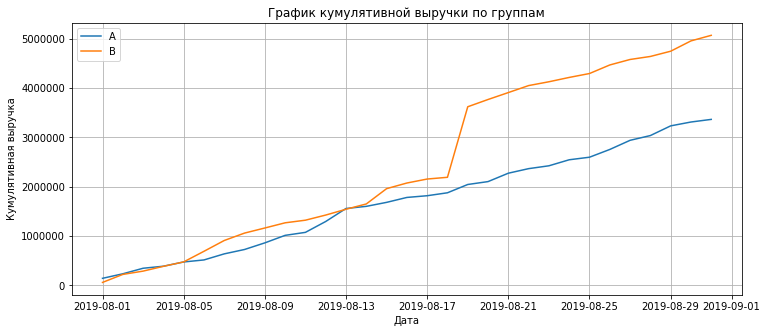

In [31]:
#Строим график кумулятивной выручки по группам
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title ('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.ticklabel_format(style='plain', axis = 'y')
#plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. В начале теста выручки были примерно равны. Затем, сегмент В стал превышать мегмент А, но 13 августа выручки снова примерно стравнялись. После этого группа В снова вырвалась вперёд и дальше уже лидировала на протяжении всего теста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### График кумулятивного среднего чека по группам

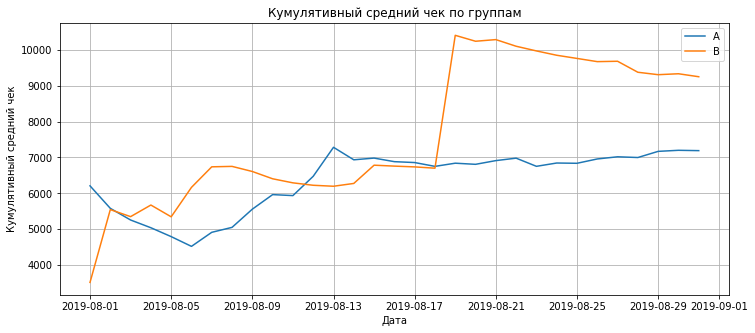

In [32]:
#Строим график среднего чека по группам
plt.figure(figsize=(12,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный средний чек')
plt.grid(True)
plt.legend();

Кумулятивное значение среднего чека по сегментам колеблется: в начале теста А превышает В, затем они меняюся местами. Затем в середине теста А снова превышает В, но примерно в середине теста происходит резкий скачок значений в группе В. Это признак аномалий или крупных заказов, которые могли оказать влияние на кумулятивное значение среднего чека.

#### График относительного изменения кумулятивного среднего чека группы В к группе А

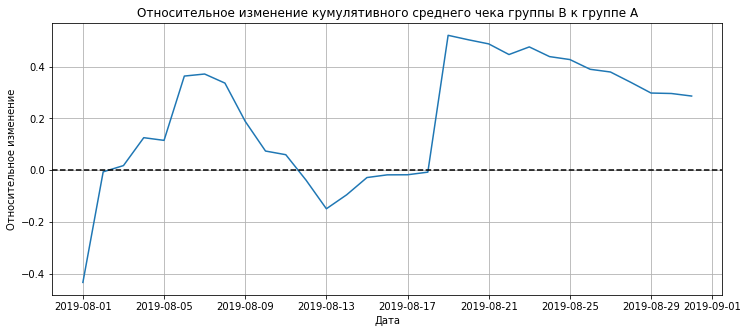

In [33]:
#Строим график относительного изменения кумулятивного среднего чека группы В к группе А 
plt.figure(figsize=(12,5))
#Собираем данные в одном датафрейме
mergedCumulativeRevenue= cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on = 'date', how = 'left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color = 'black', linestyle = '--')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.grid(True);

Средний чек группы В был в основнов выше, чем в группе А, но результаты сильно колебались. В нескольких точках результаты теста значительно и резко менялись. Это может казывать на то, что в эти даты были совершены аномально крупные заказы. После скачка значения стремятся к стабилизации и находятся на положительном уровне, что говорит о некотором преимущесте группы В над А.

#### График кумулятивного среднего количества заказов на посетителя по группам

In [34]:
#Считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

#Отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

#Отделяем данные по группе В
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

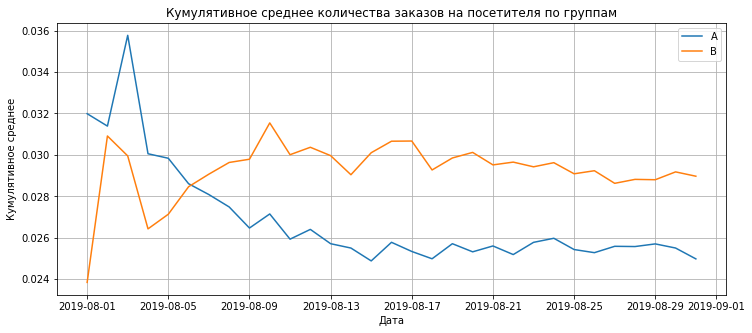

In [35]:
#Строим график
plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивное среднее количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее')
plt.grid(True)
plt.legend();

В начале теста были колебания по сегментам: сначала один превышал другой, затем наоборот. Но, примерно через неделю ситуация выровнялась, и сегмент В стал значительно опережать сегмент А. Группа В стабильно показывает более высокую конверсию, что может говорить о том, что изменения, предложенные для группы В, принесли положительный эффект.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы В к группе А

In [36]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date','conversion']], left_on = 'date', right_on = 'date', how='left', suffixes=['A', 'B'])


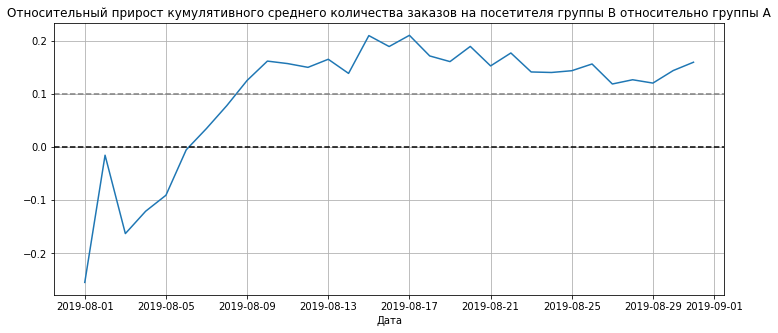

In [37]:
plt.figure(figsize=(12,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title ('Относительный прирост кумулятивного среднего количества заказов на посетителя группы В относительно группы А')
plt.xlabel('Дата')
plt.grid(True)
plt.axhline(y=0, color='black', linestyle = '--')
plt.axhline(y= 0.1, color = 'grey', linestyle = '--');

Примерно через неделю после начала теста группа В начинает лидировать: среднее количество заказов на посетителя группы В растёт, превышая среднее количество заказов группы А. Максимальная разница составляла 20%, затем начала постепенно снижаться до 10%, но затем снова начался рост, и сейчас разница составляет около 14%. 

#### Точечный график количества заказов по пользователям

In [38]:
ordersByUsers = orders.groupby('visitorId')['transactionId'].nunique().reset_index()
ordersByUsers.columns = ['visitorId', 'orders']

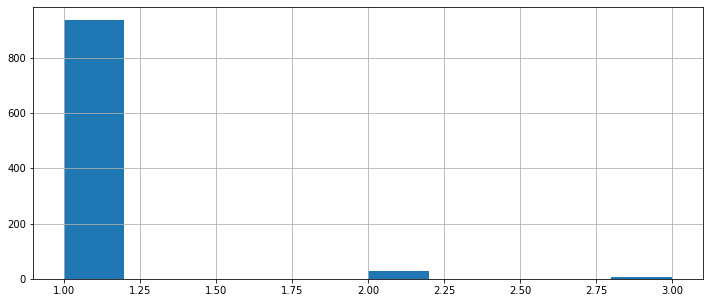

In [39]:
plt.figure(figsize =(12,5))
ordersByUsers['orders'].hist();

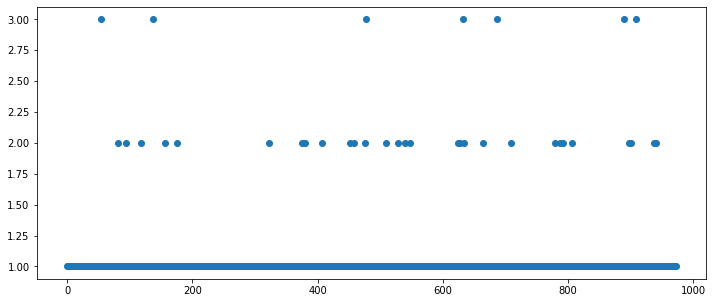

In [40]:
plt.figure(figsize=(12,5))
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

Большинство клиентов сделали один заказ. Тех, кто сделал 2 заказа уже значительно меньше. А тех, кто сделал больше 2 заказов - совсем мало. Для того, чтобы понять, какое количество заказов считать аномальным - нужно вычислить 95 и 99 перцентили.

#### 95 и 99 перцентили количества заказов на пользователя

In [41]:
print(np.percentile(ordersByUsers['orders'],[95, 99]))

[1. 2.]


Не более 5% пользователей совершали 1 заказ, и не более 1% - 2 заказа. 

#### Точечный график стоимости заказа

In [42]:
x_value = pd.Series(range(0, len(orders['revenue'])))

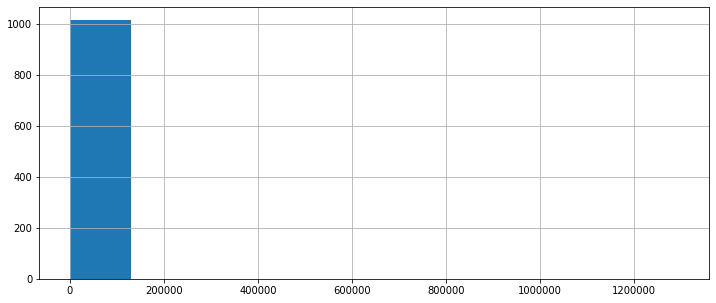

In [43]:
plt.figure(figsize=(12,5))
orders['revenue'].hist()
plt.ticklabel_format(style='plain', axis='x');

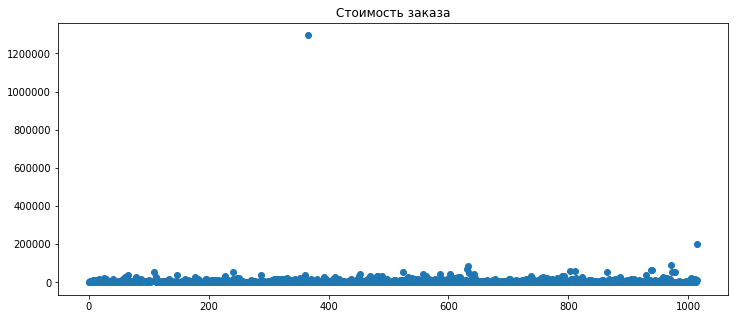

In [44]:
plt.figure(figsize=(12,5))
plt.scatter(x_value, orders['revenue'])
plt.title('Стоимость заказа')
plt.ticklabel_format(style='plain', axis='y');

Стоимость большинства заказов не превышает 100 000. Есть несколько крупных заказов - стоимостью больше 300 000 и 1 200 000.

In [45]:
filtered_orders = orders[orders['revenue']<100000]

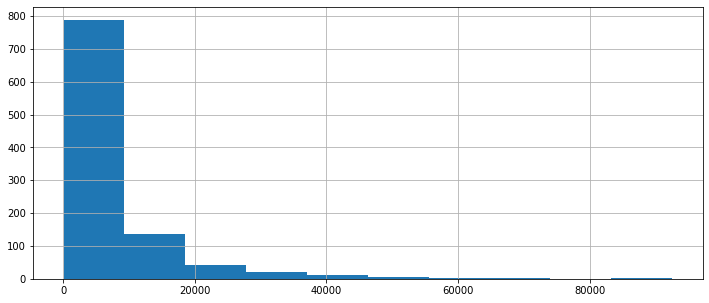

In [46]:
plt.figure(figsize=(12,5))
filtered_orders['revenue'].hist()
plt.ticklabel_format(style='plain', axis='x');

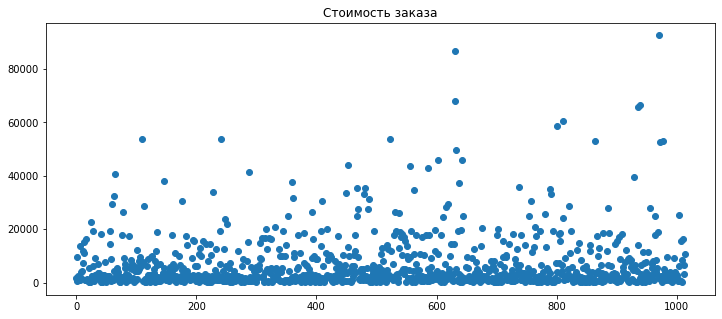

In [47]:
plt.figure(figsize=(12,5))
plt.scatter(range(len(filtered_orders)), filtered_orders['revenue'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Стоимость заказа');

При более детальном рассмотрении видно, что основная масса заказов не дороже 20 000, но есть и более крупные заказы, дороже 40 000 и даже 80 000. 

#### 95 и 99 перцентили стоимости заказов

In [48]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Не более 5% заказов дороже 26 758 и не более 1% дороже 53 904. Возьмём стоимость 53 904 как границу для определения аномально дорогих заказов.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по сырым данным

Для определения статистической значимости различий в среднем количестве заказов на посетителя между группами, сформулирем гипотезы.  

Н0: Различий в среднем количестве заказов между группами нет;  
Н1: Различия в среднем между группами есть.  

Уровень значимости примем равным 0,05.

In [49]:
#Ежедневные значения посетителей группы А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#Кумулятивные значения посещений группы А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date':'max', 'visitorsPerDateA': 'sum'}), axis = 1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] 

In [50]:
#Ежедневные значения посетителей группы В
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#Кумулятивные значения посещений группы В
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB':'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB'] 

In [51]:
#Ежедневные значения количества заказов и доходов группы А 
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
ordersADaily.columns =['date', 'ordersPerDateA', 'revenuePerDateA']

#Кумулятивные значения количества заказов и доходов группы А
ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date':'max', 'ordersPerDateA':'sum', 'revenuePerDateA':'sum'}), axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA'] 

In [52]:
#Ежедневные значения количества заказов и доходов группы В
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']].groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
ordersBDaily.columns = ['date','ordersPerDateB', 'revenuePerDateB']

#Кумулятивные значения количества заказов и доходов группы В
ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date':'max','ordersPerDateB':'sum', 'revenuePerDateB':'sum'}), axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB'] 

In [53]:
#Объединяем данные в одну таблицу
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left').merge(ordersACummulative, left_on='date', right_on='date', how='left').merge(ordersBCummulative, left_on='date', right_on='date', how='left').merge(visitorsADaily, left_on='date', right_on='date', how='left').merge(visitorsBDaily, left_on='date', right_on='date', how='left').merge(visitorsACummulative, left_on = 'date', right_on = 'date', how = 'left').merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

In [54]:
#Количество уникальныз заказов пользователей группы А
ordersByUsersA = (orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

#Количество уникальных заказов пользователей группы В
ordersByUsersB = (orders[orders['group']== 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

In [55]:
pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders')
[ordersByUsersA['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders')]

#Создадим переменные, где пользователям с заказами будет соотвествовать число заказов пользователя
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders')], axis = 0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name = 'orders')], axis = 0)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA,sampleB)[1]))
print("Относительное различие в среднем между группами = {0:.3f}".format(sampleB.mean()/sampleA.mean() - 1))

p-value = 0.011
Относительное различие в среднем между группами = 0.160


Полученное значение p-value гораздо меньше заданного уровня статистической значимости, а значит, нулевую гипотезу можно отвергнуть и полагать, что в среднем количестве заказов мнжду группами есть статистически значимые различия.  

Относительный прирост среднего в группе В к конверсии группы А равен 16%.

#### Статистическая значимость различий в среднем чеке заказа между группами  по сырым данным

Для определения статистической значимости различий в среднем чеке заказа между группами, сформулирем гипотезы.  

Н0: Различий в среднем чеке заказа между группами нет;  
Н1: Различия в среднем чеке заказа между группами есть.  

Уровень значимости примем равным 0,05.

In [56]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительное различие среднего чека между группамми = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean() - 1))

p-value = 0.829
Относительное различие среднего чека между группамми = 0.287


Полученное значение больше заданного уровня значимости, а значит, нулевую гипотезу мы отвергнуть не можем, и будем считать, что статистически значимых различий в среднем чеке между группами нет.   

При этом наблюдаемое относительное различие среднего чека между группами составляет почти 29%. Однако, это значение статистически значимым, что может быть обусловлено высокой вариативностью данных.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по очищенным данным

In [57]:
#Пользователи с числом заказов больше 2
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] >2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],], axis=0)

In [58]:
#Пользователи, совершившие заказы дороже 53 904
usersWithExpensiveOrders = orders[orders['revenue']> 53904]['visitorId']

#Объединим данные в общей таблице
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

In [59]:
#Очищенные данные о заказах группы А
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders',),], axis=0,)

#Очищеннве данные о заказах группы В
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name = 'orders',),], axis=0,)

Для определения статистической значимости различий в среднем количестве заказов на посетителя между группами, сформулирем гипотезы.  

Н0: Различий в среднем количестве заказов между группами нет;  
Н1: Различия в среднем между группами есть.  

Уровень значимости примем равным 0,05.

In [60]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительное различие в среднем между группами = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean() - 1))

p-value = 0.007
Относительное различие в среднем между группами = 0.189


Полученное значение p-value меньше заданного уровня значимости, а значит, мы можем отвергнуть нулевую гипотезу об отсутствии статистически значимых различий в среднем количестве заказов между группами. В данном случае есть основания считать, что статистически значимые различия между группами А и В существуют.  

Относительный прирост среднего в группе В к конверсии группы А равен 18,9%

#### Статистическая значимость различий в среднем чеке заказа между группами по очищенным данным

Для определения статистической значимости различий в среднем чеке заказа между группами, сформулирем гипотезы.

Н0: Различий в среднем чеке заказа между группами нет;  
Н1: Различия в среднем чеке заказа между группами есть.

Уровень значимости примем равным 0,05.

In [61]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]))
print('Относительное различие в среденем чеке = {0:.3f}'.format(orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean() - 1))

p-value = 0.788
Относительное различие в среденем чеке = -0.032


Наблюдаемое относительное различие среднего чека между группами составляет -3,2%.
Однако, полученное значение p-value гораздо больше заданного уровня значимости, и значит мы не можем отвергнуть нулевую гипотезу об отсутствии различий между группами. Таким образом мы имеем основания считать, что различие не является статистически 
значимым, и что различий в среднем чеке заказа между группами не существует.  

# Вывод 

На основании полученных результатов можно сделать вывод о том, что тест можно завершить. Различий в среднем чеке не выявлено, тестировать дальше не имеет смысла. Что касаемо конверсии, то по "очищенным" от аномальных заказов данных здесь был получен прирост в 18,9% (статистически значимые отличия). Про "сырым" данным отличия также являются статистически значимыми, здесь прирост составил 16%.

Результаты указывают на то, что изменения в группе В имеют положительное влияние на конверсию. Прирост конверсии в 18,9% по очищенным данным - это достаточно существенное улучшение. 

Отсутствие значимых различий в среднем чеке указывает, что изменения в группе В не оказывают существенного влияния на сумму среднего чека. Небольшой отрицательный эффект при анализе "очищенных" от аномальных заказов данных (-3,2%) не является критическим, если есть улучшения по другим метрикам. Прирост в конверсии означает, что группа В приводит к большему числу заказов, что может компенсировать снижение среднего чека. При анализе "сырых" данных различия между средними чеками в группе составляли почти 29%, что было вызвано аномально большими заказами. 

По результатам можно принять решение о прекращении теста и зафиксировать победу группы В (стабильно более высокая конвенрсия по отношению к группе А, и практически равные значения среднего чека).